In [ ]:
!pip install jupyter_black
!pip install "edsnlp[ml]==0.10.5"
%reload_ext jupyter_black

# Introduction to Named Entity Reocgnition (NER) and its clinical applications

This notebook will explore the world of NER, examining the underlying concepts and techniques that make it possible and showcasing real-world applications of NER in the medical domain.

## What Is Named Entity Recognition ?

At its core, Named Entity Recognition, or NER for short, is a subtask of NLP that focuses on identifying and classifying entities within textual data. These entities encompass a diverse range of information, including names of individuals, organizations, locations, dates, numerical values, and more. NER equips machines with the ability to extract these entities, making it a fundamental tool for diverse applications across various industries.



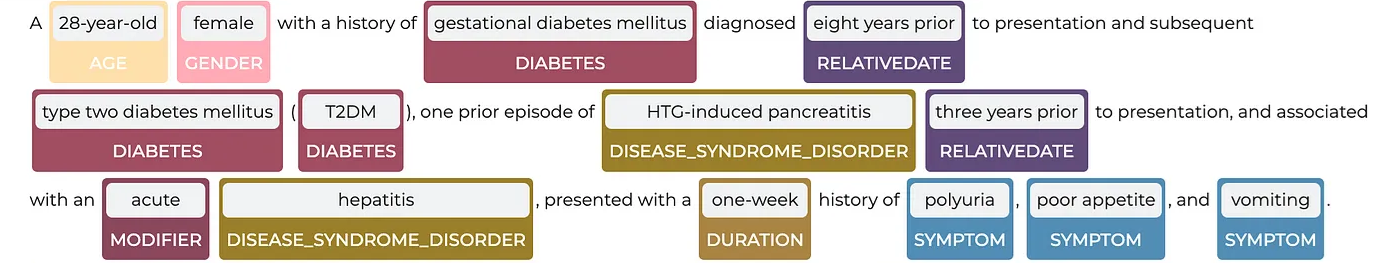

From the above image, you might have gotten some ideas about what an NER model does. The model can find different entities that are present in the text, such as persons, dates, organizations, and locations. Thus NER helps in adding more meaning to the text document. In simple words, you can say that it is doing information extraction.

## Task: Detecting chemicals and drugs in a medical document

The objective of this first class is to extract automatically with a NER method the chemicals and drugs from medical documents

## I. Rule-Based Approaches
Rule-based approaches are one of the earliest and simplest techniques used for named entity recognition (NER). In rule-based approaches, a set of handcrafted rules and patterns are defined to identify entities in text data.

### i. NER on one text with manual patterns


#### Introduction to Spacy

spaCy is a free, open-source library for advanced Natural Language Processing (NLP) in Python. For more information check out the [documentation](https://spacy.io/usage/spacy-101).


#### Architecture

The central data structures in spaCy are the [Language](https://spacy.io/api/language) class, the [Vocab](https://spacy.io/api/vocab) and the [Doc](https://spacy.io/api/doc) object. The `Language` class is used to process a text and turn it into a `Doc` object. It’s typically stored as a variable called `nlp`. The `Doc` object owns the **sequence of tokens** and all their annotations. The `Doc` object is constructed by the [Tokenizer](https://spacy.io/api/tokenizer), and then modified in place by the components of the pipeline.

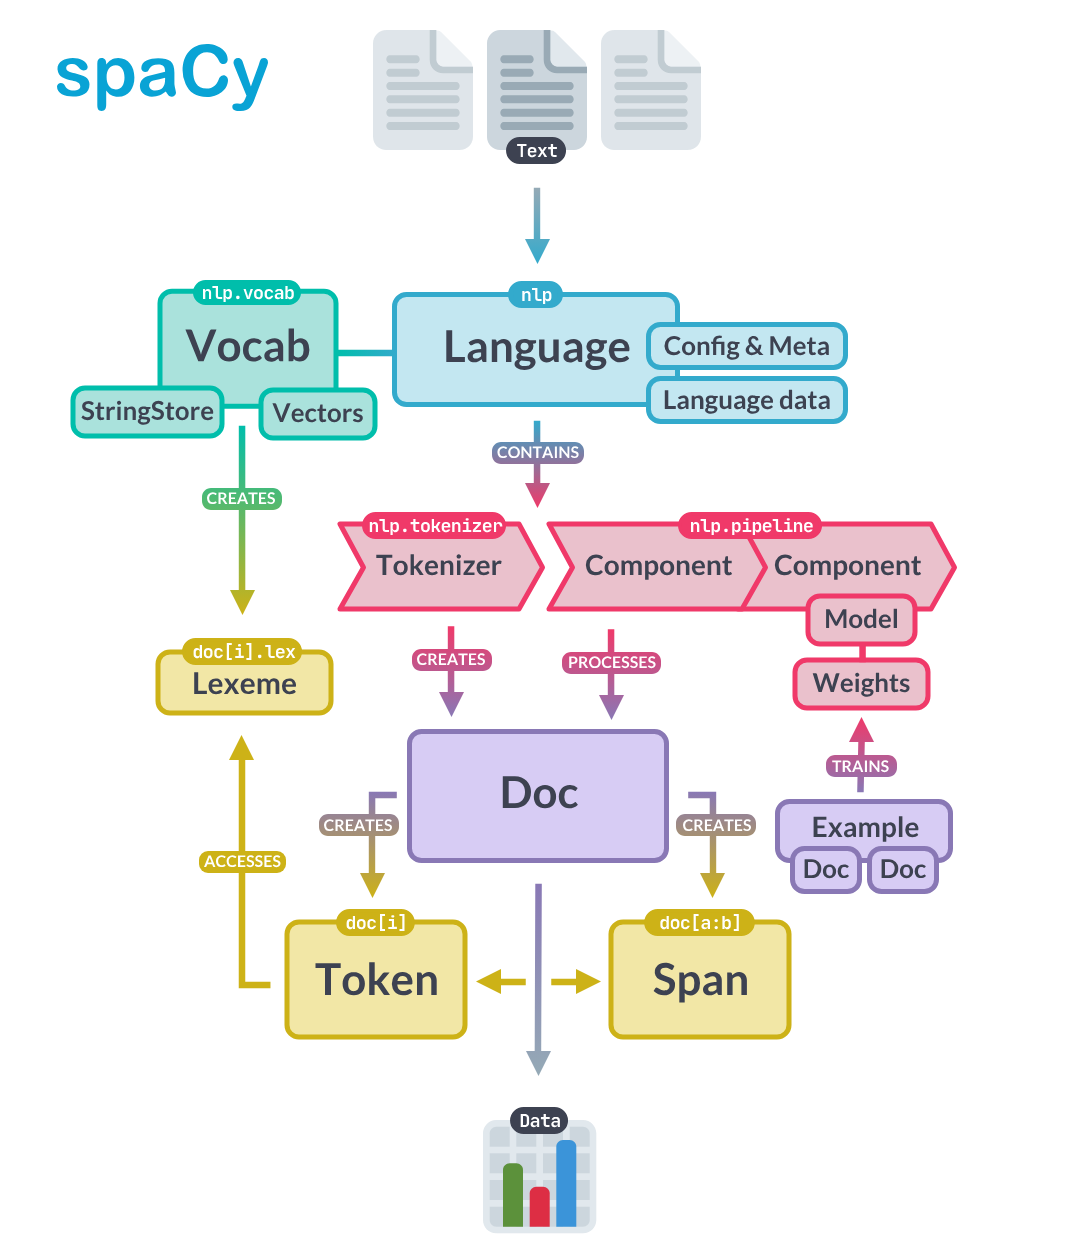




#### First example

Let's try with a simple example: Extract Disorder (DISO) and the Drug name (DRUG) from the text below:

`"Le patient atteint de Covid 19 ne tolère pas le paracétamol"`


In [ ]:
import spacy

print(spacy.__version__)

In [ ]:
text = "Le patient atteint de Covid 19 ne tolère pas le paracétamol"
print(text)

#### Tokenization

During processing, spaCy first tokenizes the text, i.e. segments it into words, punctuation and so on. This is done by applying rules specific to each language. For example, punctuation at the end of a sentence should be split off – whereas “U.K.” should remain one token. Each Doc consists of individual tokens, and we can iterate over them:

While punctuation rules are usually pretty general, tokenizer exceptions strongly depend on the specifics of the individual language. This is why each available language has its own subclass, like English or French, that loads in lists of hard-coded data and exception rules in the [spacy.blank](https://spacy.io/usage/spacy-101#annotations) method 

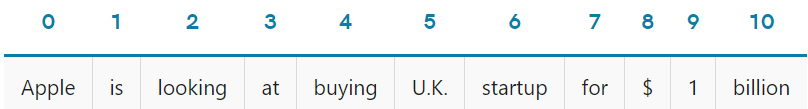

In [ ]:
# Import the NLP framework spaCy
import spacy

# Load the French language model
nlp = spacy.blank("fr")

# Apply the pipeline and get a spaCy Doc object.
doc = nlp(text)

# If you do not want to run the pipeline but only tokenize the text
doc = nlp.make_doc(text)

# Text processing in spaCy is non-destructive
doc.text == text

# You can access a specific token
token = doc[2]  # The third token

# And create a Span using slices
span = doc[:3]  # The first three tokens

print(f"The tokens: {list(doc)}\nA Span: {doc[:3]}")

#### Using the entity ruler

The [EntityRuler](https://spacy.io/api/entityruler) is a pipeline component that’s typically added via [nlp.add_pipe](https://spacy.io/api/language#add_pipe). When the nlp object is called on a text, it will find matches in the doc and add them as entities to the `doc.ents`, using the specified pattern label as the entity label. If any matches were to overlap, the pattern matching most tokens takes priority. If they also happen to be equally long, then the match occurring first in the Doc is chosen.

In [ ]:
# Create a new pipeline component for entity recognition
ruler = nlp.add_pipe("entity_ruler")

#### Define [Entity patterns](https://spacy.io/usage/rule-based-matching#entityruler-patterns)

Entity patterns are dictionaries with two keys: "label", specifying the label to assign to the entity if the pattern is matched, and "pattern", the match pattern. The entity ruler accepts two types of patterns:

1. Phrase patterns for exact string matches (string).

```python
{"label": "ORG", "pattern": "Apple"}
```

2. Token patterns with one dictionary describing one token (list).

```python
{"label": "GPE", "pattern": [{"LOWER": "san"}, {"LOWER": "francisco"}]}
```


In [ ]:
# Define some patterns to match entities
patterns = [
    {
        "label": "DRUG",
        "pattern": "paracétamol",
    },  # match "PARACETAMOL" as a "Chemical and drug"
    {
        "label": "DISO",
        "pattern": [{"LOWER": "covid"}, {"LOWER": "19"}],
    },  # match "Covid 19" as a disorder
    # LOWER attribute makes it case insensitive: it matchs also "CoVId 19"
]

# Add the patterns to the entity ruler
ruler.add_patterns(patterns)


# Process some text with the pipeline
doc = nlp(text)


# Print the recognized entities and their labels
print([(ent.text, ent.label_) for ent in doc.ents])

#### Visualizing the entity recognizer

The entity visualizer, `ent`, highlights named entities and their labels in a text.

In [ ]:
import spacy
from spacy import displacy

displacy.render(doc, style="ent")

#### Your turn !

**Sub-task 1**: Extract with the Spacy [entity_ruler](https://spacy.io/api/entityruler) pipeline the "Chemicals and Drugs" (`CHEM` label) from the text below: `Carbonate de lithium`, `antihistaminique` and `Cétirizine`.

```
"Perfusion d'une ampoule de Carbonate de lithium et introduction d'un antihistaminique par Cétirizine 10 mg x 2 par jour, avec diminution puis disparition de l'oedème."
```

In [ ]:
text = "Perfusion d'une ampoule de Carbonate de lithium et introduction d'un antihistaminique par Cétirizine 10 mg x 2 par jour, avec diminution puis disparition de l'oedème."
print(text)

In [ ]:
### Load the French language model
nlp = spacy.blank("fr")

# Create a new pipeline component for entity recognition
ruler = nlp.add_pipe("entity_ruler")

# Define some patterns to match entities
## TO DO ##
# Find the 3 patterns matching Carbonate de lithium, antihistaminique and Cétirizine
patterns = [
    {
        "label": "CHEM",
        "pattern": [{"LOWER": "carbonate"}, {"LOWER": "de"}, {"LOWER": "lithium"}],
    },  # match "Polarmine" as a Chem
    {
        "label": "CHEM",
        "pattern": [{"LOWER": "antihistaminique"}],
    },  # match "Cétirizine" as a Chem
    {
        "label": "CHEM",
        "pattern": "Cétirizine",
    },  # match "Cétirizine" as a Chem
]

# Add the patterns to the entity ruler
ruler.add_patterns(patterns)

# Process some text with the pipeline
doc = nlp(text)

# Print the recognized entities and their labels
print([(ent.text, ent.label_) for ent in doc.ents])

displacy.render(doc, style="ent")

#### **Issue**: The pipeline does not apply to all drugs 

In [ ]:
text = "Le patient a avalé un comprimé de FLUOCARIL BI-FLUORE le matin, un doliprane le midi et deux Paracetamol le soir"

# Process some text with the pipeline
doc = nlp(text)

# Print the recognized entities and their labels
print([(ent.text, ent.label_) for ent in doc.ents])

displacy.render(doc, style="ent")

#### **Solution**: Adding all known french drug names in the pipeline's patterns

### ii. NER on one text with a knowledge dictionary

#### a. Load the drugs dictionary

##### Introducing ROMEDI database

We are using the "Référentiel Ouvert du Médicament" (ROMEDI). [ROMEDI](https://bioportal.lirmm.fr/ontologies/ROMEDI?p=summary) is a database derived from the public drug database: http://base-donnees-publique.medicaments.gouv.fr/ It was created and is maintained by the Equipe de Recherche en Informatique Appliquée à la Santé (ERIAS), Université de Bordeaux, Inserm [Cossin et al., 2019](https://ebooks.iospress.nl/publication/51952).

It contains **5789 drug names**.

In [ ]:
import json

# Path of the knowledge dictionary
drugs_dict_path = "/kaggle/input/drugs-dictionary/drugs.json"

# Opening JSON file
with open(drugs_dict_path) as json_file:
    drugs_dict = json.load(json_file)

print(drugs_dict)

#### b. Using the entity ruler with large amount of patterns

**Sub-task 2**: Add all drug names from the [ROMEDI](https://bioportal.lirmm.fr/ontologies/ROMEDI?p=summary) database to the Spacy [entity_ruler](https://spacy.io/api/entityruler) pipeline's patterns. In order to extract the "Chemicals and Drugs" (`CHEM` label) from the text below:

```
""Le patient a avalé un comprimé de FLUOCARIL BI-FLUORE le matin, un doliprane le midi et deux Paracetamol le soir"
```

*Tips*:
- Make sure it is case insensitive (Use **LOWER** atribute for token patterns).
- Make sure it matchs drugs with multiple tokens such as "FLUOCARIL BI-FLUORE".

In [ ]:
text = "Le patient a avalé un comprimé de FLUOCARIL BI-FLUORE le matin, un doliprane le midi et deux Paracetamol le soir"
print(text)

In [ ]:
# Load the French language model
nlp = spacy.blank("fr")

# Create a new pipeline component for entity recognition
ruler = nlp.add_pipe("entity_ruler")

# Define some patterns to match entities
## TO DO ##
# Find the patterns matching all drug names from ROMEDI database
# Be careful with the drugs containint multiple tokens
patterns = [
    {
        "label": "CHEM",
        "pattern": [{"LOWER": token.lower()} for token in drug.split(" ")],
    }
    for drug_list in drugs_dict.values()
    for drug in drug_list
]

ruler.add_patterns(patterns)

# Process some text with the pipeline
doc = nlp(text)

# Print the recognized entities and their labels
print([(ent.text, ent.label_) for ent in doc.ents])

displacy.render(doc, style="ent")

#### **Issue**: the pipeline does not detect drugs with **accents**

Now we have a rule-based pipeline able to detect any drugs from the ROMEDI database. **However, It does not detect drugs with accents.**

In [ ]:
text = "Le patient a avalé un comprimé de FLUOCARIL BI-FLUORE le matin, un doliprane le midi et deux Paracétamol le soir"

# Process some text with the pipeline
doc = nlp(text)

# Print the recognized entities and their labels
print([(ent.text, ent.label_) for ent in doc.ents])

displacy.render(doc, style="ent")

#### **Solution**: Normalizing the text before the NER process

#### c. Normalization

The normalisation scheme adheres to the non-destructive doctrine. In other words,`nlp(text).text == text` is always true. To achieve this, the input text is never modified.Instead, the `norm_` attribute of each token is modified.

**Sub-task 3**: Remove accents from the `norm_` attribute of each token by using the `unidecode()` function.

In [ ]:
from unidecode import unidecode


@spacy.Language.component("normalize")
def normalize(doc):
    for token in doc:
        ## TO DO ##
        ## Remove accent from `.norm_` accent
        token.norm_ = unidecode(token.norm_)
    return doc

In [ ]:
# Load the French language model
nlp = spacy.blank("fr")

# Create a new pipeline component for entity recognition
nlp.add_pipe("normalize")

# Create a new pipeline component for entity recognition
ruler = nlp.add_pipe("entity_ruler")

# Define some patterns to match entities
## TO DO ##
# Use the NORM attribute instead of LOWER attribute
patterns = [
    {
        "label": "CHEM",
        "pattern": [{"NORM": token.lower()} for token in drug.split(" ")],
    }
    for drug_list in drugs_dict.values()
    for drug in drug_list
]

ruler.add_patterns(patterns)

# Process some text with the pipeline
doc = nlp(text)

# Print the recognized entities and their labels
print([(ent.text, ent.label_) for ent in doc.ents])

displacy.render(doc, style="ent")

#### Congrats

Now we have a rule-based pipeline, normalizing text and detecting any drugs from the ROMEDI database. Let's try it on a real Corpus.

In [ ]:
nlp.to_disk("model_rule_based")